## 1. Project Overview & Objectives

This project presents an **Discriptive Analysis** &  Basic **Exploratory Data Analysis (EDA)** of the COVID-19 vaccination drive in India.

The primary goal is to **explore & understand the vaccination patterns, progress, identify key insights, and visualize the progress of the vaccination drive**. 

By analyzing this data, we aim to:
* **Track Vaccination Progress:** Monitor the overall pace of vaccination, including total doses administered, and the number of individuals receiving first and second doses.
* **Assess Data Quality:** Identify missing values, inconsistent entries, and appropriate data types to ensure the reliability of our analysis.
* **Identify Key Trends:** Observe how vaccination numbers change over time and across different regions.

Analyzing this data is crucial as this analysis provides a foundational understanding of the vaccination efforts,\
which can be valuable for public health assessment and policy evaluation.



#### 1.1 Data Source & Description

##### - Data Source
* The dataset used is `covid_vaccine_statewise2.csv`, sourced from **[Kaggle.com](https://www.kaggle.com/datasets)**

##### - Dataset Description
* This file contains daily, state-wise COVID-19 vaccination records for India,\
including `Updated On` (date), `State`, various `Doses Administered` counts, and `Total Individuals Vaccinated`,\
alongside demographic breakdowns (gender, age groups), and other metrics like `Sessions` and `Sites`.

##### 1.2 Dataset Size
* The dataset contains approximately **7,633 rows** and **24 columns**.

##### 1.3 Methodology / EDA Steps

* This descriptive analysis followed a standard EDA pipeline:

##### 2. Data Loading & Initial Inspection (`.head()`, `.info()`, `.describe()`)
##### 3. Data Cleaning (`.drop()`, `data type Conversion`, `renaming columns`)
##### 4. Data Visualization Actions (`Pie chart` , `Line chart` , `Bar chart`)
##### 5. Challenges & Limitations.
##### 6. Future work


## 2. Data Loading & Initial Inspection

The first crucial step in any data analysis project is to load the dataset and get a preliminary understanding of its structure and content.



### 📦 Libraries Used

- `pandas`: For data loading, cleaning, and analysis
- `numpy`: For numerical operations and array handling.
- `matplotlib.pyplot`: For basic plotting and visualization (e.g., line graphs, bar charts, pie charts)
- `matplotlib.ticker`: For customizing tick labels on axes (e.g., showing 10,000 as 10k or 1M)\
These libraries form the core of exploratory data analysis (EDA) in Python.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # For formatting axis labels

### 2.1 Data Loading
We load the `covid_vaccine_statewise2.csv` file into a pandas DataFrame named `df`. This file contains state-wise daily vaccination records.

In [7]:
df = pd.read_csv('covid_vaccine_statewise2.csv')

### 2.2 Initial Data Inspection - Glimpse of the Data (`df.head()`)


The `df.head()` command provides a quick look at the first 5 rows of the DataFrame.\
This helps us to immediately see the column names and get a sense of the kind of data each column holds.\
From the output, we can observe columns such as `Updated On` (date of update), `State`, various dose administration counts (`Total Doses Administered`, `First Dose Administered`, `Second Dose Administered`), and individual counts broken down by gender and age groups.


In [12]:
df.head(2)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0,23.0
1,17-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0,23.0


### 2.3 Initial Data Inspection - Data Types and Missing Values (`df.info()`)


The `df.info()` method provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types for each column. This is incredibly important for:
* **Identifying Missing Data:** Columns with significantly fewer non-null entries compared to the total number of entries (`7633` in this dataset) indicate the presence of missing values.
* We can clearly see that columns like `Male (Doses Administered)`, `Female (Doses Administered)`, `Transgender (Doses Administered)`, `18-44 Years (Doses Administered)`, `45-60 Years (Doses Administered)`, `60+ Years (Doses Administered)`, have  **`0 non-null`**  values.\
  **This suggests they are entirely empty and likely candidates for removal.**

* **Checking Data Types:** We observe that `Updated On` is currently an `object` or `string` type.\
 For time-series analysis, this column will need to be converted to a `datetime` format.\
 Other numerical columns appearing with `float64` data types , they should be `int64`.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7633 non-null   object 
 1   State                                7633 non-null   object 
 2   Total Doses Administered             7415 non-null   float64
 3   Sessions                             7415 non-null   float64
 4    Sites                               7415 non-null   float64
 5   First Dose Administered              7415 non-null   float64
 6   Second Dose Administered             7415 non-null   float64
 7   Male (Doses Administered)            0 non-null      float64
 8   Female (Doses Administered)          0 non-null      float64
 9   Transgender (Doses Administered)     0 non-null      float64
 10   Covaxin (Doses Administered)        7415 non-null   float64
 11  CoviShield (Doses Administered

####  **`df.describe()`** 
This provides a consice and quick statistical summary of the numerical columns in DataFrames.
below we can see- 
* `count`     Number of non-null values\
* `mean`	    Average value\
* `std`	    Standard deviation\
* `min`	    Minimum value\
* `25%`	    25th percentile (Q1)\
* `50%`	    Median (Q2)\
* `75%`	    75th percentile (Q3)\
* `max`	    Maximum value


In [19]:
df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.415000e+03,7.415000e+03,7415.000000,7.415000e+03,7.415000e+03,0.0,0.0,0.0,7.415000e+03,7.415000e+03,...,0.0,0.0,0.0,5.288000e+03,5.289000e+03,5.289000e+03,7.415000e+03,7.415000e+03,7415.000000,7.597000e+03
mean,4.720335e+06,2.462739e+05,1173.123264,3.808916e+06,9.114184e+05,NaN,NaN,NaN,5.368106e+05,4.175775e+06,...,NaN,NaN,NaN,1.904190e+06,2.226731e+06,1.835109e+06,2.302453e+06,2.020113e+06,718.469049,4.219136e+06
std,7.877656e+06,4.724983e+05,1557.088007,6.299814e+06,1.636821e+06,NaN,NaN,NaN,9.838332e+05,6.931911e+06,...,NaN,NaN,NaN,3.433211e+06,2.957336e+06,2.349956e+06,4.090176e+06,3.505041e+06,1492.768922,7.519920e+06
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000e+00,7.000000e+00,...,NaN,NaN,NaN,1.059000e+03,1.136000e+03,5.580000e+02,0.000000e+00,2.000000e+00,0.000000,0.000000e+00
25%,1.287485e+05,5.755000e+03,67.000000,1.081580e+05,1.235100e+04,NaN,NaN,NaN,0.000000e+00,1.256235e+05,...,NaN,NaN,NaN,1.079855e+05,1.277470e+05,7.747900e+04,5.573950e+04,5.128200e+04,8.000000,9.411000e+04
50%,7.517130e+05,3.736200e+04,545.000000,6.219820e+05,1.276590e+05,NaN,NaN,NaN,7.600000e+03,6.917980e+05,...,NaN,NaN,NaN,4.537235e+05,1.041444e+06,8.884520e+05,3.836600e+05,3.291230e+05,111.000000,6.447160e+05
75%,6.099970e+06,3.052925e+05,1563.500000,4.985715e+06,1.058346e+06,NaN,NaN,NaN,6.635935e+05,5.486316e+06,...,NaN,NaN,NaN,1.875092e+06,3.121520e+06,2.760411e+06,2.678347e+06,2.509139e+06,776.000000,5.055364e+06
max,5.444772e+07,8.171330e+06,12350.000000,4.593249e+07,1.211255e+07,NaN,NaN,NaN,6.171089e+06,4.825801e+07,...,NaN,NaN,NaN,2.658372e+07,1.700704e+07,1.272274e+07,3.064344e+07,2.378586e+07,18415.000000,5.444772e+07


### 2.4 `df.columns`

The command returns the **list of all column names** in  DataFrame `df`.
* This is useful to quickly inspect or loop through your dataset's features.
* Below, there are showing the total columns names available in df.

In [23]:
df.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

### 2.5 `df.dtypes`

The command `df.dtypes` shows the **data type of each column** in your DataFrame. This is essential for:
-  Validating types for analysis (e.g., ensuring dates are `datetime64`, numerical fields are `int` or `float`)
-  Knowing when to convert or clean data types


In [27]:
df.dtypes

Updated On                              object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
AEFI                                   float64
18-44 Years (Doses Administered)       float64
45-60 Years (Doses Administered)       float64
60+ Years (Doses Administered)         float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Male(Individuals Vaccinated)           float64
Female(Indivi

#### Check data types of a single column

In [30]:
df['Sessions'].dtypes

dtype('float64')

## 3. Data Cleaning & Preprocessing

- Based on our initial inspection (especially from `df.info()` and `df.describe()`),\
  it's clear that some columns are either completely empty or contain redundant information.
- Dropping these columns will **clean our dataset, reduce memory usage, and focus our analysis on relevant features.**


### 3.1 Dropping Redundant/Empty Column

#### `df.drop()` – Drop Columns or Rows

- The command `df.drop()` is used to **remove specific rows or columns** from a DataFrame.

#### `df.drop(columns=[], inplace=True)` – (Recommended Way)

- This syntax is the **recommended approach** for dropping  **one or more columns** from a DataFrame.

In [35]:
df.drop(columns=['Total Doses Administered'], inplace=True)

In [37]:
df.drop(columns=["First Dose Administered" ,"Second Dose Administered", "Male (Doses Administered)",
          "Female (Doses Administered)", "Transgender (Doses Administered)", "AEFI",
          "18-44 Years (Doses Administered)", "45-60 Years (Doses Administered)", "60+ Years (Doses Administered)"] ,inplace=True)

####  What Happens:

The specified columns are permanently removed from the DataFrame `df` (because of inplace=True).\
The structure of `df` is **updated** — these columns no longer exist.\
Here, we can see total **14** columns are exits.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7633 non-null   object 
 1   State                                7633 non-null   object 
 2   Sessions                             7415 non-null   float64
 3    Sites                               7415 non-null   float64
 4    Covaxin (Doses Administered)        7415 non-null   float64
 5   CoviShield (Doses Administered)      7415 non-null   float64
 6   Sputnik V (Doses Administered)       2914 non-null   float64
 7   18-44 Years(Individuals Vaccinated)  5288 non-null   float64
 8   45-60 Years(Individuals Vaccinated)  5289 non-null   float64
 9   60+ Years(Individuals Vaccinated)    5289 non-null   float64
 10  Male(Individuals Vaccinated)         7415 non-null   float64
 11  Female(Individuals Vaccinated)

### 3.2  `df.isnull().sum()` – Check for Missing Values


- The command `df.isnull().sum()` is used to **identify missing values (null or NaN)*** in each column of your DataFrame.
- It returns the **count of missing (null or NaN) values** in each column of the DataFrame.
- Here we can see there are numerous columns contains huge NaN values. 


In [44]:
df.isnull().sum()

Updated On                                0
State                                     0
Sessions                                218
 Sites                                  218
 Covaxin (Doses Administered)           218
CoviShield (Doses Administered)         218
Sputnik V (Doses Administered)         4719
18-44 Years(Individuals Vaccinated)    2345
45-60 Years(Individuals Vaccinated)    2344
60+ Years(Individuals Vaccinated)      2344
Male(Individuals Vaccinated)            218
Female(Individuals Vaccinated)          218
Transgender(Individuals Vaccinated)     218
Total Individuals Vaccinated             36
dtype: int64

####  Solutions for Missing Values
1.  Fill with **Mode** value (if the column contain categorical data).\
        Syntax: **df['Column_name'] = df['column_name'].fillna(df['column_name'].mode(), inplace = True)**
   
2. Fill Missing Values with **0** (if 0 is a logical default).\
    Syntax: **df['Column_name'] = df['column_name'].fillna(0), inplace = True)**
     
4. Fill with **Mean/Median** value (if the column is **continuous/numeric**).\
    Syntax: **df['Column_name'] = df['column_name'].fillna(df['column_name'].median(), inplace = True)**
    
5. Filling missing values with just **preseding values** of null. if 2 before nan so fill with 2.  
    Syntax: **df.fillna(method='ffill', inplace=True)  #forward filling**

6. Filling missing values with just **successding values** of null. if 5 after the nan so fill with 5.\
    Syntax: **df.fillna(method='bfill')    #backward filling**

   

 **Fill NaN values for SINGLE Column**

In [48]:
#Fill NaN values for Single Column
df['Sessions'] = df['Sessions'].fillna(df['Sessions'].median()) 
df[' Sites '] = df[ ' Sites '].fillna(df[' Sites '].median()) 

 **Fill NaN values of MULTIPLE Columns**

In [51]:
df[[' Covaxin (Doses Administered)', 
    'CoviShield (Doses Administered)',
    'Sputnik V (Doses Administered)',
   '18-44 Years(Individuals Vaccinated)',
   '45-60 Years(Individuals Vaccinated)',
   '60+ Years(Individuals Vaccinated)',
   'Male(Individuals Vaccinated)',
   'Female(Individuals Vaccinated)',
   'Transgender(Individuals Vaccinated)',
   'Total Individuals Vaccinated']] = df[[
        ' Covaxin (Doses Administered)',
        'CoviShield (Doses Administered)',
        'Sputnik V (Doses Administered)',
        '18-44 Years(Individuals Vaccinated)',
        '45-60 Years(Individuals Vaccinated)',
        '60+ Years(Individuals Vaccinated)',
        'Male(Individuals Vaccinated)',
        'Female(Individuals Vaccinated)',
        'Transgender(Individuals Vaccinated)',
        'Total Individuals Vaccinated'
    ]].fillna(0)

In [53]:
#check again for any NaN values
df.isnull().sum()

Updated On                             0
State                                  0
Sessions                               0
 Sites                                 0
 Covaxin (Doses Administered)          0
CoviShield (Doses Administered)        0
Sputnik V (Doses Administered)         0
18-44 Years(Individuals Vaccinated)    0
45-60 Years(Individuals Vaccinated)    0
60+ Years(Individuals Vaccinated)      0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Individuals Vaccinated           0
dtype: int64

#### **`df.shape`** - Dataset Dimensions
The command **`df.shape`** returns the **dimensions of your DataFrame** as a tuple: (rows, columns).


In [56]:
df.shape   
# Here 7633 rows and 14 columns in df.

(7633, 14)

### 3.3 Changing Column Data Types

- To ensure correct data analysis, we convert certain columns to their appropriate data types.
- To change column data types, you can use the **`.astype()`** method for **numeric or object/string columns** and  **`pd.to_datetime()`** for **date columns**.

- We use **`errors='coerce'`**  with `pd.to_datetime()` to turn unparseable dates into NaT (Not a Time),\
  This is generally safer than letting it raise an error and stop execution.

In [60]:
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

C:\Users\admin\AppData\Local\Temp\ipykernel_8236\3864921456.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')


##### Convert Single Columns data types:  float to 'Int64' 


In [63]:
df['Sessions'] = df['Sessions'].astype('Int64')

##### Convert Multi Columns data types  :  float to 'Int64' 


In [66]:
df = df.astype({
    ' Sites ': 'Int64',     
    ' Covaxin (Doses Administered)': 'Int64',
    'CoviShield (Doses Administered)': 'Int64',           
    'Sputnik V (Doses Administered)': 'Int64',
    '18-44 Years(Individuals Vaccinated)': 'Int64',
    '45-60 Years(Individuals Vaccinated)': 'Int64',
    '60+ Years(Individuals Vaccinated)': 'Int64',
    'Male(Individuals Vaccinated)': 'Int64',    
    'Female(Individuals Vaccinated)': 'Int64',  
    'Transgender(Individuals Vaccinated)': 'Int64',    
    'Total Individuals Vaccinated': 'Int64',
})

##### Below we check the columns list with new data types.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           7633 non-null   datetime64[ns]
 1   State                                7633 non-null   object        
 2   Sessions                             7633 non-null   Int64         
 3    Sites                               7633 non-null   Int64         
 4    Covaxin (Doses Administered)        7633 non-null   Int64         
 5   CoviShield (Doses Administered)      7633 non-null   Int64         
 6   Sputnik V (Doses Administered)       7633 non-null   Int64         
 7   18-44 Years(Individuals Vaccinated)  7633 non-null   Int64         
 8   45-60 Years(Individuals Vaccinated)  7633 non-null   Int64         
 9   60+ Years(Individuals Vaccinated)    7633 non-null   Int64         
 10  Male(Individ

### 3.4 Renaming Columns name for easy manipualtion

#### Renaming Columns with `df.rename(columns={})`

- To make column names shorter and easier to work with, we rename them using the `rename()` method.
- This makes the column names cleaner for plotting and analysis.


In [73]:
df = df.rename(columns={'Male(Individuals Vaccinated)': 'male_individuals_vaccinated'})
df = df.rename(columns={'Female(Individuals Vaccinated)': 'Female_individuals_vaccinated'})
df = df.rename(columns={'Transgender(Individuals Vaccinated)': 'Transgender_individuals_vaccinated'})
df.head(2)

,Updated On,State,Sessions,Sites,Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),male_individuals_vaccinated,Female_individuals_vaccinated,Transgender_individuals_vaccinated,Total Individuals Vaccinated
0,2021-01-16,Andaman and Nicobar Islands,2,2,0,23,0,0,0,0,12,11,0,23
1,2021-01-17,Andaman and Nicobar Islands,2,2,0,23,0,0,0,0,12,11,0,23


## 4. Data Visualization Actions

 Visualizing the **cleaned** data is crucial for **uncovering patterns, trends, and outliers** that might not be apparent from raw numbers.

 **Visualization** helped you:
- Compare vaccination rates by state, gender, month, and vaccine type.
- Show **trends** by (line chart), **distributions** by (bar/pie charts), and **rankings** clearly.
- This section will focus on creating various plots to tell the story of India's COVID-19 vaccination drive.


###  4.1  Pie chart for 'Top 5 States having Total Individuals vaccinated'

#### Total Individuals Vaccinated by State
- To compute the total number of vaccinated individuals for each state, we group by `State` and sum the values:

- What It Does:\
Groups the data by each State.\
Sums the values in the 'Total Individuals Vaccinated' column for each state.\
Returns a Series with states as the index and total vaccinated counts as values.



In [78]:
Total_ind_vaccinated = df.groupby('State')['Total Individuals Vaccinated'].sum()

In [427]:
Total_ind_vaccinated

State
Andaman and Nicobar Islands                   15045841
Andhra Pradesh                              1432936042
Arunachal Pradesh                             55269081
Assam                                        659402120
Bihar                                       1616905272
Chandigarh                                    51381704
Chhattisgarh                                 889029072
Dadra and Nagar Haveli and Daman and Diu      36433660
Delhi                                        729208129
Goa                                           85461972
Gujarat                                     2454555013
Haryana                                      849658257
Himachal Pradesh                             361469034
Jammu and Kashmir                            457096548
Jharkhand                                    672333880
Karnataka                                   2120524612
Kerala                                      1415123650
Ladakh                                        20670820
Laks

#### Since `Total_ind_vaccinated` is a **Pandas Series** (not a DataFrame), the .info() method gives you:

- Number of entries (e.g., number of states)
- Data type of index
- Data type of values
- Memory usage

In [430]:
Total_ind_vaccinated.info()

<class 'pandas.core.series.Series'>
Index: 36 entries, Andaman and Nicobar Islands to West Bengal
Series name: Total Individuals Vaccinated
Non-Null Count  Dtype
--------------  -----
36 non-null     Int64
dtypes: Int64(1)
memory usage: 1.6+ KB


#### Top 5 States by Total Individuals Vaccinated
- To identify the **top 5 states with the highest total number of individuals vaccinated**.
- Uses the `nlargest()` function, which **sorts** and  **returns the top N values** from a Series.

In [433]:
top_5_states = Total_ind_vaccinated.nlargest(5)

#### The command returns the vaccination totals (just the numbers) for the top 5 states as a NumPy array.
- These are the total individuals vaccinated in each of the top 5 states, in the same order as top_5_states.index.


In [436]:
top_5_states

State
Maharashtra      3198784382
Uttar Pradesh    3087978276
Rajasthan        2468678509
Gujarat          2454555013
West Bengal      2128245934
Name: Total Individuals Vaccinated, dtype: Int64

In [438]:
top_5_states.index

Index(['Maharashtra', 'Uttar Pradesh', 'Rajasthan', 'Gujarat', 'West Bengal'], dtype='object', name='State')

In [440]:
top_5_states.values

<IntegerArray>
[3198784382, 3087978276, 2468678509, 2454555013, 2128245934]
Length: 5, dtype: Int64

####  Plotting Pie chart for  'Top 5 States (Total Individuals vaccinated)'

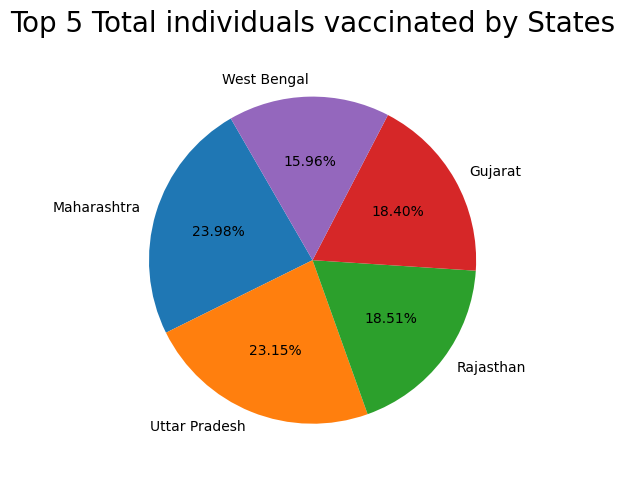

In [443]:
plt.figure(figsize=(5 ,5 ))   # Adjusted figure size for labels

plt.pie(top_5_states.values, labels = top_5_states.index,
     autopct = '%.2f%%', shadow = False, startangle = 120)

# Adding title
plt.title('Top 5 Total individuals vaccinated by States', fontsize=20)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.tight_layout()  # Adjust layout
plt.show()

#### Key Insights:

- **Maharashtra** leads with **23.98%** of total vaccinations among the top 5, showcasing **strong vaccination infrastructure** and public participation.
- **Uttar Pradesh** closely follows with **23.15%**, indicating a successful mass outreach in India’s most populous state.
- **Rajasthan (18.51%)** and **Gujarat (18.40%)** have nearly equal shares, reflecting balanced efforts in their campaigns.
- **West Bengal** has the smallest share in the top 5 with **15.96%**, yet still represents a substantial contribution compared to other states outside the top 5.

### 4.2  State-wise Vaccination Distribution  

#### Data Preparation: Sum 'Total Individuals Vaccinated' for each state
To understand how vaccines were distributed across Indian states:
1. Group the data by **`State`**
2. Sum the **`Total Individuals Vaccinated` per state**

In [448]:
state_vaccination = df.groupby('State')['Total Individuals Vaccinated'].sum().dropna()

3. **Sort** the values in **descending** order

In [451]:
state_vaccination = state_vaccination.sort_values(ascending=False).head(10) # Get top 20 states


4. Plot using a **bar chart (vertical)**, 
This reveals which states had the highest and lowest vaccine coverage.

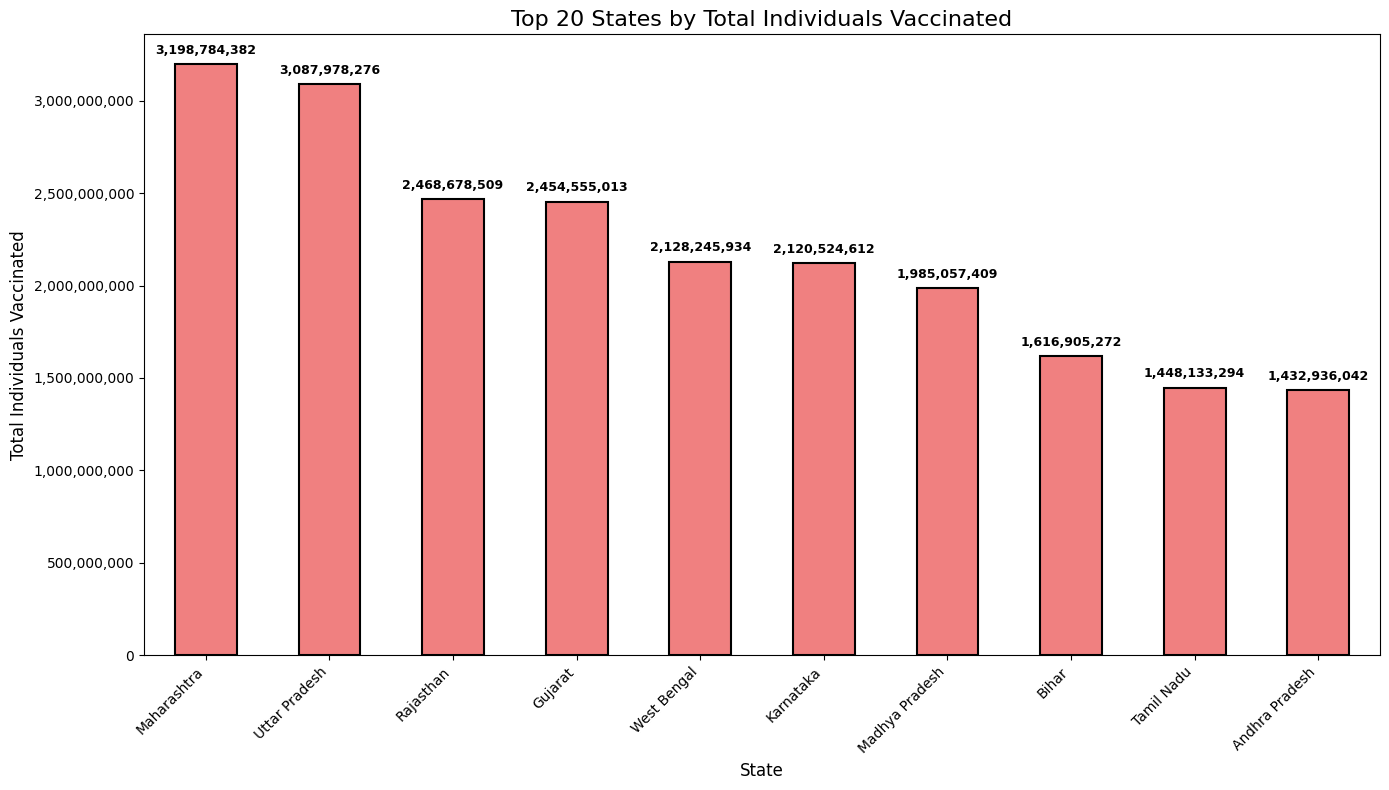

In [454]:

plt.figure(figsize=(14, 8)) # Adjusted figure size for labels
ax = state_vaccination.plot(kind='bar', color='lightcoral') # Create a bar plot and get the axes object

plt.title('Top 20 States by Total Individuals Vaccinated', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Individuals Vaccinated', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis


# Adding borders around the bars by drawing rectangles
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# --- Add Data Labels ---
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','), # The text label (formatted with commas)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position: x (center of bar), y (top of bar)
                ha='center', va='center', # Horizontal and vertical alignment
                xytext=(0, 10), # Offset text slightly above the bar
                textcoords='offset points', # Interpret xytext as offset points
                fontsize=9, color='black', weight='bold')

plt.tight_layout()
plt.show()
plt.savefig('vaccination_by_state_bar_chart_with_labels.png', dpi=300)
plt.close()
print("Plot saved as 'vaccination_by_state_bar_chart_with_labels.png'")

#### 🔍 **Observations:**
- **Maharashtra** leads the chart with over **3.19 billion** vaccinations, closely followed by **Uttar Pradesh** with approximately **3.08 billion**.
- Other high-performing states include **Rajasthan**, **Gujarat**, and **West Bengal**, all crossing the **2 billion** mark.
- The vaccination efforts in **southern and central states** like **Karnataka**, **Madhya Pradesh**, **Tamil Nadu**, and **Andhra Pradesh** also show substantial numbers.
- Despite differences in population, most large states managed to conduct high-volume vaccination campaigns effectively.


###  4.3  Vaccination Distribution by Gender using Bar Chart 

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           7633 non-null   datetime64[ns]
 1   State                                7633 non-null   object        
 2   Sessions                             7633 non-null   Int64         
 3    Sites                               7633 non-null   Int64         
 4    Covaxin (Doses Administered)        7633 non-null   Int64         
 5   CoviShield (Doses Administered)      7633 non-null   Int64         
 6   Sputnik V (Doses Administered)       7633 non-null   Int64         
 7   18-44 Years(Individuals Vaccinated)  7633 non-null   Int64         
 8   45-60 Years(Individuals Vaccinated)  7633 non-null   Int64         
 9   60+ Years(Individuals Vaccinated)    7633 non-null   Int64         
 10  male_individ

#### 👥 Vaccination Distribution by Gender
To analyze vaccine reach among different genders:
1. Sum up the columns:
   - `Male(Individuals Vaccinated)`
   - `Female(Individuals Vaccinated)`
   - `Transgender(Individuals Vaccinated)`

In [461]:
gender_distribution = df[['male_individuals_vaccinated', 
                          'Female_individuals_vaccinated', 
                          'Transgender_individuals_vaccinated']].sum()

In [463]:
gender_distribution

male_individuals_vaccinated           17072685545
Female_individuals_vaccinated         14979137345
Transgender_individuals_vaccinated        5327448
dtype: Int64

- Clean up index labels for the plot

In [466]:
gender_distribution.index = ['Male','Female','Transgender']

In [468]:
gender_distribution

Male           17072685545
Female         14979137345
Transgender        5327448
dtype: Int64

2. Plot the totals using a **bar chart.**\
  This helps assess gender equity in vaccine distribution.

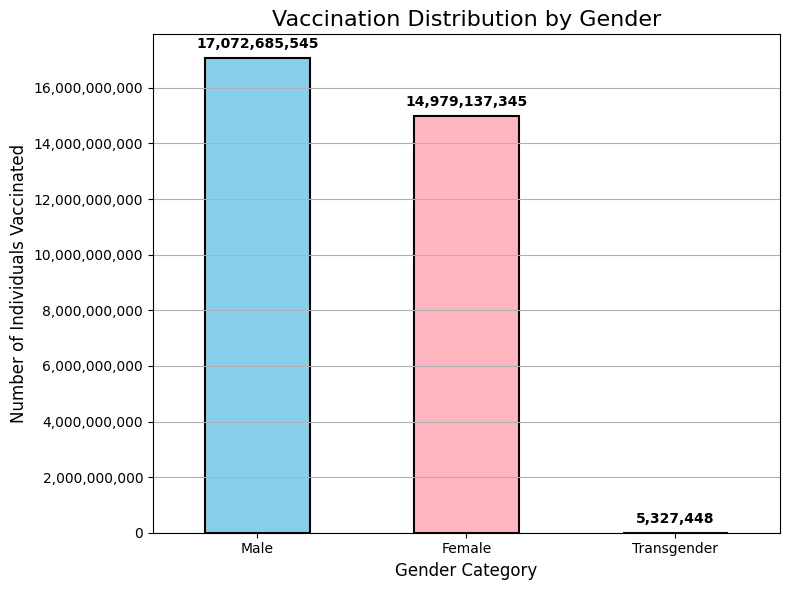

In [471]:

plt.figure(figsize= (8, 6)) # Adjusted figure size for labels
ax = gender_distribution.plot(kind='bar', color=['skyblue', 'lightpink', 'plum'])

plt.title('Vaccination Distribution by Gender',fontsize=16)
plt.xlabel('Gender Category', fontsize=12)
plt.ylabel('Number of Individuals Vaccinated',fontsize=12)
plt.xticks(rotation=0, fontsize=10)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')

# Adding borders around the bars by drawing rectangles
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# --- Add Data Labels ---
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.savefig('gender_doses_bar_chart_with_labels.png', dpi=300)
plt.close()
print("Plot saved as 'gender_doses_bar_chart_with_labels.png'")

#### 🔍 **Observations:**
- **Male individuals** received the highest number of vaccinations with **17.07 billion doses**, followed by **Female individuals** with **14.97 billion doses**.
- The **transgender category** recorded a significantly lower number of vaccinations, around **5.3 million**, likely due to smaller population size and accessibility challenges.

#### 📌 **Insights:**
- The relatively close numbers between males and females suggest a balanced outreach of the vaccination program across genders.
- The extremely low figure for the transgender population highlights the need for **greater inclusivity** and **targeted awareness** in health campaigns for marginalized groups.


### 4.4   Vaccination Trend over Time by Line charts

#### 📈 Trend of Total Individuals Vaccinated Over Time

To visualize the vaccination trend:
- Convert the date column to datetime

In [476]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

- Group by date and sum the total individuals vaccinated
 

In [479]:
daily_vaccinations = df.groupby('Updated On')['Total Individuals Vaccinated'].sum()

In [481]:
daily_vaccinations

Updated On
2021-01-16     48276
2021-01-17     58604
2021-01-18     99449
2021-01-19    195525
2021-01-20    251280
               ...  
2021-08-12    133533
2021-08-13    133533
2021-08-14    133533
2021-08-15    133533
2021-08-16         0
Name: Total Individuals Vaccinated, Length: 213, dtype: Int64

- Calculate a 7-day rolling average to smooth fluctuations


In [484]:
daily_vaccinations_rolling = daily_vaccinations.rolling(window=7).mean().fillna(0)

In [486]:
daily_vaccinations_rolling

Updated On
2021-01-16    0.000000e+00
2021-01-17    0.000000e+00
2021-01-18    0.000000e+00
2021-01-19    0.000000e+00
2021-01-20    0.000000e+00
                  ...     
2021-08-12    2.874694e+08
2021-08-13    2.165864e+08
2021-08-14    1.448893e+08
2021-08-15    7.291494e+07
2021-08-16    1.144569e+05
Name: Total Individuals Vaccinated, Length: 213, dtype: float64

- Plot the data using `matplotlib.pyplot`
This helps us understand the pace and pattern of vaccination rollout over time.

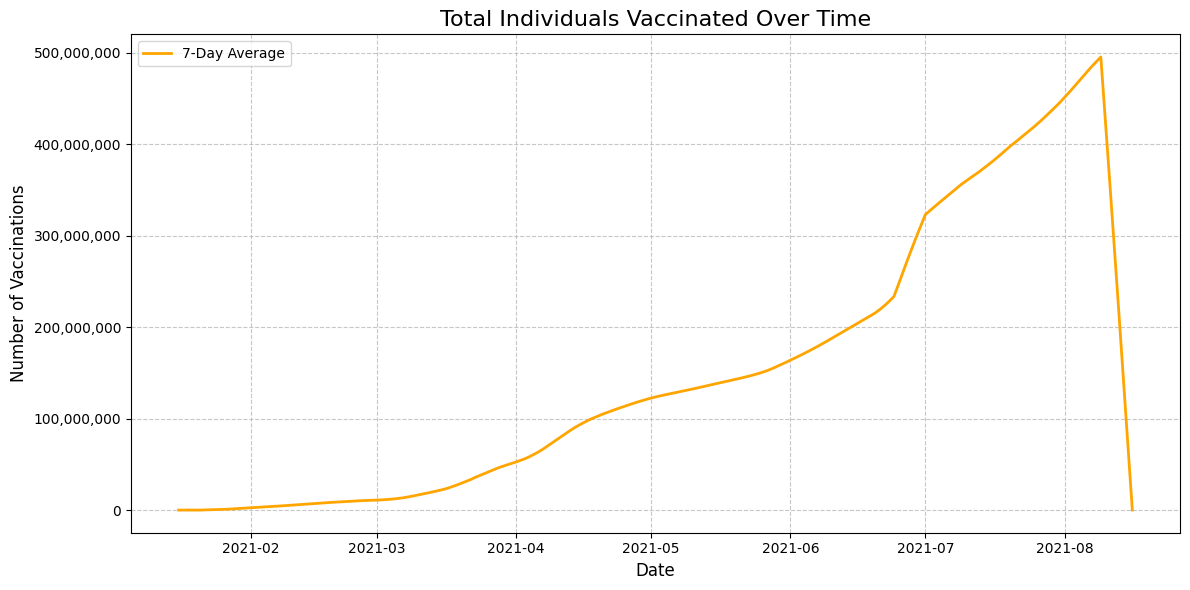

In [489]:

plt.figure(figsize=(12,6))  #set figure size
plt.plot(daily_vaccinations_rolling, label='7-Day Average', color='orange', linewidth=2)
plt.title('Total Individuals Vaccinated Over Time', fontsize=16) # Set plot title

plt.xlabel('Date', fontsize=12) # Set x-axis label
plt.ylabel('Number of Vaccinations', fontsize=12) # Set y-axis label

plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis with commas
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('total_doses_trend_line_plot.png', dpi=300) # Save the plot as a PNG image
plt.close() # Close the plot to free memory (optional in Jupyter, good practice)

### 🔍 Observation:

1. **Steady Growth Phase (Feb – May 2021):**  
   - Vaccination numbers increased gradually.  

2. **Acceleration Phase (June – July 2021):**  
   - A sharp rise is observed in total vaccinations.  

3. **Peak Point (Late July / Early August 2021):**
   - Vaccinations hit the highest level during this time.  
   - Likely due to increased vaccine availability and strong public health outreach.

4. **Sudden Drop (Mid-August 2021):**  
   - A steep fall appears at the end of the chart.  
   - This could be due to missing or incomplete data beyond a certain date.

### 4.5 📈 Monthly Trend of Total Individuals Vaccinated by Line Charts

To analyze the vaccination progress over months:\
**1.** Convert the **`Updated On`** column to datetime format (if not already).

In [494]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

**2.** Extract month using `df['Updated On'].dt.to_period('M')`.


In [497]:
df['Month'] = df['Updated On'].dt.to_period('M').dt.to_timestamp()

df.info()

**3.**  Group by month and sum up the total individuals vaccinated.

In [501]:
monthly_vaccinations = df.groupby('Month')['Total Individuals Vaccinated'].sum()

In [503]:
monthly_vaccinations

Month
2021-01-01       18764911
2021-02-01      216096372
2021-03-01      940683423
2021-04-01     2915821612
2021-05-01     4450751102
2021-06-01     6840949348
2021-07-01    12260094401
2021-08-01     4409614360
Name: Total Individuals Vaccinated, dtype: Int64

**4.** Plot the monthly totals using a line chart.\
This visualization reveals broader trends and growth over time.


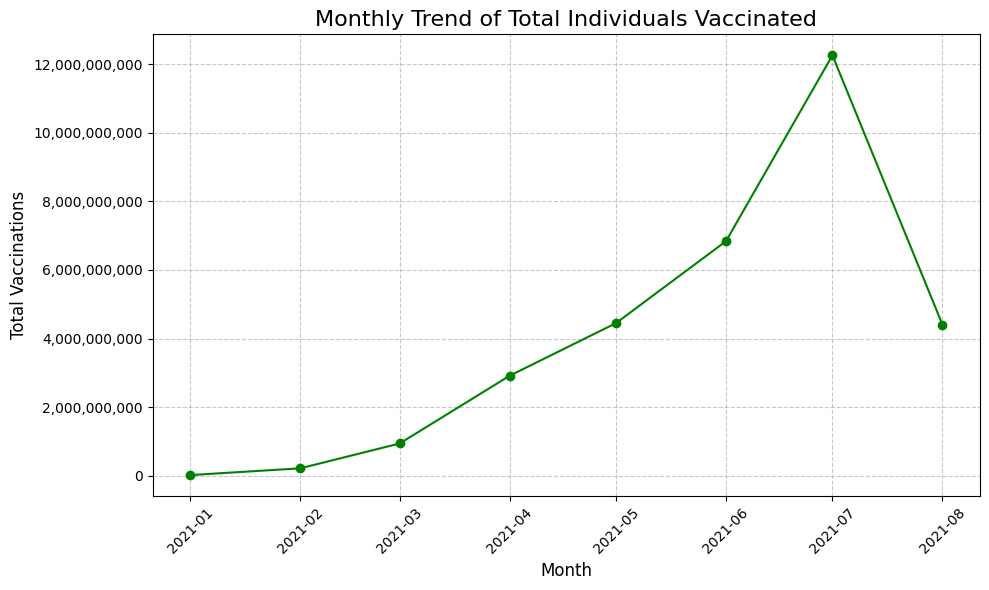

In [286]:

plt.figure(figsize=(10, 6)) # Set the size of the plot

plt.plot(monthly_vaccinations, marker='o', linestyle='-', color='green')
plt.title('Monthly Trend of Total Individuals Vaccinated' ,fontsize = 16)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Total Vaccinations',fontsize = 12)
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis with commas

plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()
plt.savefig('total_doses_trend_line_plot.png', dpi=300) # Save the plot as a PNG image
plt.close() # Close the plot to free memory (optional in Jupyter, good practice)


#### 🔍 **Observations:**
- The vaccination campaign started gradually in **January 2021**, with very low numbers.
- There was a steady rise in vaccinations from **March to June**, reflecting expanding eligibility and better supply chains.
- A significant **peak occurred in July 2021**, reaching over **12 billion doses** – likely due to mass drives and state-level campaigns.
- However, there was a **sharp decline in August 2021**, possibly due to:
  - Reduced urgency after the peak,
  - Supply or distribution limitations,
  - A saturation effect in early adopters.

#### 📌 **Insights:**
- The chart demonstrates a **clear exponential growth pattern** up to July, showing the increasing reach and momentum of the national vaccination program.
- The post-July drop indicates either a decline in demand or external constraints that affected the pace.


### 4.6 Vaccination Distribution by Age Group(Bar Chart) 

#### 👶🧓 Vaccination Distribution by Age Group

To evaluate vaccination coverage across age segments:\
**1.** Sum up vaccinations in the following groups:
   - 18–44 years
   - 45–60 years
   - 60+ years

In [289]:
# Data Preparation: Sum doses administered for each age group across all records
age_group_doses = df[[
    '18-44 Years(Individuals Vaccinated)',
    '45-60 Years(Individuals Vaccinated)',
    '60+ Years(Individuals Vaccinated)'
]].sum()

In [291]:
age_group_doses

18-44 Years(Individuals Vaccinated)    10069357490
45-60 Years(Individuals Vaccinated)    11777178188
60+ Years(Individuals Vaccinated)       9705892065
dtype: Int64

- Clean up index labels for the plot

In [297]:
age_group_doses.index = ['18-44 Years', '45-60 Years', '60+ Years']

In [299]:
age_group_doses

18-44 Years    10069357490
45-60 Years    11777178188
60+ Years       9705892065
dtype: Int64

**2.** Use a **bar** chart to display the totals.\
 This helps identify which age groups received more vaccines and assess targeting efficiency.

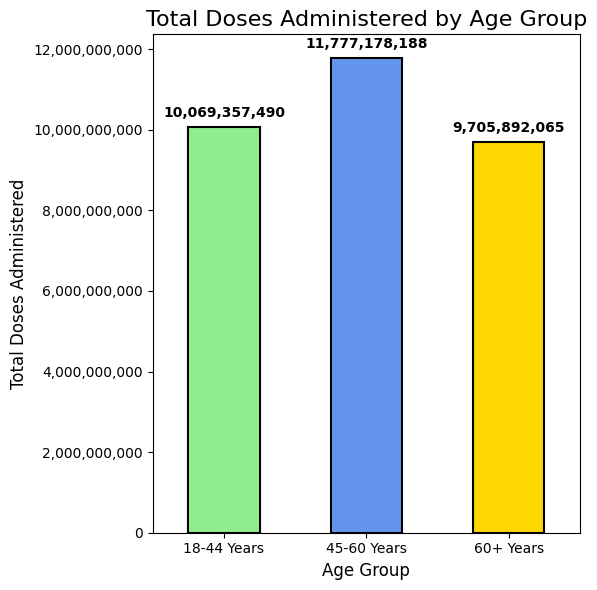

<Figure size 640x480 with 0 Axes>

In [316]:
plt.figure(figsize=(6,6)) # Set plot size
color = ['lightgreen', 'cornflowerblue', 'gold']
ax = age_group_doses.plot(kind='bar', color=color) # Create bar plot with custom colors
plt.title('Total Doses Administered by Age Group', fontsize=16) # Plot title
plt.xlabel('Age Group', fontsize=12) # X-axis label
plt.ylabel('Total Doses Administered', fontsize=12) # Y-axis label
plt.xticks(rotation=0, fontsize=10) # No rotation needed
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis with commas


# Adding borders around the bars by drawing rectangles
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# --- Add Data Labels ---
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')

plt.tight_layout() # Adjust layout
plt.show()
plt.savefig('Total Doses Administered by Age Group.png', dpi=300) # Save the plot as a PNG image


### 🔍 Observation:

- **45–60 Years Age Group** received the **highest number of vaccine doses** (~11.77 billion).
- The **18–44 Years Group** followed closely behind with **~10.07 billion doses**.
- The **60+ Years Group** received the **lowest**, though still significant, number of doses (~9.71 billion).


### 4.7  Vaccine-wise Distribution

#### 💉 Vaccine-wise Distribution

**Data Preparation:** Sum vaccine doses administered for each types of vaccine across all records\
To analyze how many doses of each vaccine were used:\
**1.** Sum the columns:
   - Covaxin (Doses Administered)
   - Covishield (Doses Administered)
   - Sputnik V (Doses Administered)

In [324]:
# Sums each column and drops if all values were NaN values
vaccinated_df = df[[
    ' Covaxin (Doses Administered)',
    'CoviShield (Doses Administered)',
    'Sputnik V (Doses Administered)'
]].sum()
vaccinated_df

 Covaxin (Doses Administered)       3980450783
CoviShield (Doses Administered)    30963371665
Sputnik V (Doses Administered)        14459217
dtype: Int64

**2.**  **Sort** the value in **ascending** order.

In [326]:
vaccinated_df = vaccinated_df.sort_values(ascending=True)

**2.** Visualize the data using a **bar chart.**

This helps understand which vaccines were most widely used during the campaign.

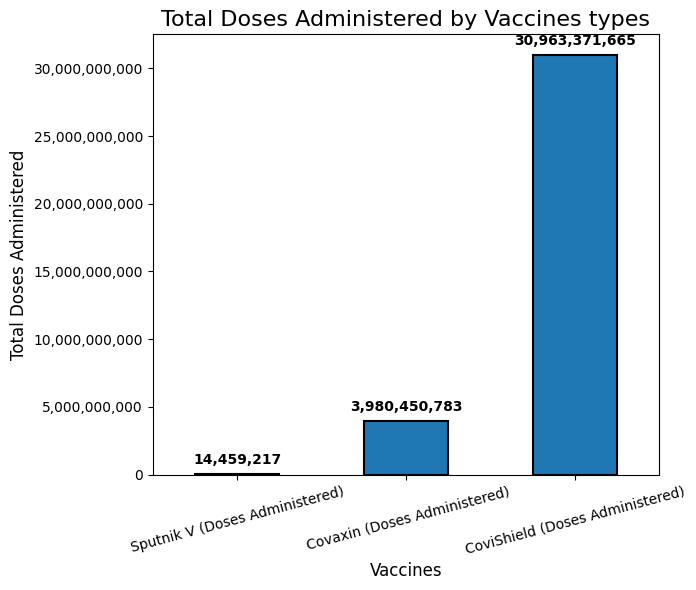

In [338]:

plt.figure(figsize=(7,6))
ax = vaccinated_df.plot(kind='bar', title='Total Vaccine Doses Administered')
plt.title('Total Doses Administered by Vaccines types', fontsize=16) # Plot title
plt.xlabel('Vaccines', fontsize=12) # X-axis label
plt.ylabel('Total Doses Administered', fontsize=12) # Y-axis label
plt.xticks(rotation=15, fontsize=10) # No rotation needed
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis with commas


# Adding borders around the bars by drawing rectangles
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# --- Add Data Labels ---
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black', weight='bold')

plt.tight_layout() # Adjust layout
plt.show()


####  **Vaccine Breakdown:**
- **Covishield**:  
  ➤ Dominates the vaccination drive with **30,963,371,665** doses administered.  
  ➤ Manufactured by Serum Institute of India (licensed from AstraZeneca).

- **Covaxin**:  
  ➤ The second most used vaccine with **3,980,450,783** doses.  
  ➤ An inactivated virus vaccine developed by Bharat Biotech.

- **Sputnik V**:  
  ➤ The least administered with only **14,459,217** doses.  
  ➤ A Russian-developed vaccine, introduced later and in limited quantities.

#### 🔍 **Observations:**
- **Covishield** accounted for the overwhelming majority of doses, likely due to:
  - Higher production capacity,
  - Early availability,
  - Widespread distribution network.

- **Covaxin** played a supportive role but was slower to scale initially.

- **Sputnik V** had minimal adoption, possibly due to:
  - Late entry into the market,
  - Supply and logistical issues,
  - Limited public preference.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           7633 non-null   datetime64[ns]
 1   State                                7633 non-null   object        
 2   Sessions                             7633 non-null   Int64         
 3    Sites                               7633 non-null   Int64         
 4    Covaxin (Doses Administered)        7633 non-null   Int64         
 5   CoviShield (Doses Administered)      7633 non-null   Int64         
 6   Sputnik V (Doses Administered)       7633 non-null   Int64         
 7   18-44 Years(Individuals Vaccinated)  7633 non-null   Int64         
 8   45-60 Years(Individuals Vaccinated)  7633 non-null   Int64         
 9   60+ Years(Individuals Vaccinated)    7633 non-null   Int64         
 10  male_individ

* To download your cleaned dataset in a Jupyter Notebook, use the pandas.DataFrame.to_csv() function.


In [84]:
df.to_csv("cleaned_covid_vaccine_data.csv", index=False)

## 5. Challenges & Limitations


#### Key challenges and limitations encountered include:
- During this project, we encountered several challenges and recognized certain limitations inherent in the dataset:


#### 1. Extensive Missing Data: 
- A significant portion of the granular demographic data (e.g., doses administered by gender, and by specific age groups, and Sputnik V, AEFI) was entirely missing (0 non-null values).
- This severely limited the ability to conduct detailed demographic analysis or assess specific vaccine type usage directly from this dataset.

#### 2. Data Aggregation vs. Granularity: 
- The dataset is state-wise daily aggregated data. 
While useful for overall trends, it limited individual-level detail, which could provide richer insights into vaccination patterns.


#### 3. Lack of External Context: 
- Without integrating population or disease incidence data, calculating rates or correlating vaccination with outcomes is not possible.





## 6. Future Work..



### To expand upon this project, future analyses on-going include:

##### 1.  Integration with Population Data: Calculate vaccination percentages per state/district to understand coverage rates accurately.
##### 2. Correlation Analysis: Explore the relationship between vaccination rates and key  indicators (e.g., daily new cases, mortality rates).
##### 3. Advanced Time-Series Forecasting: Use models to predict future vaccination trends based on historical data.
##### 5. Interactive Dashboard Development: Create an interactive dashboard (using tools like Plotly Dash or Streamlit) to allow users to explore the data dynamically.



#                                                                Thank You!